<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-:-a-visual-intuition-of-activation-functions" data-toc-modified-id="Introduction-:-a-visual-intuition-of-activation-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction : a visual intuition of activation functions</a></span></li><li><span><a href="#Build-an-MLP-to-classify-MNIST-images" data-toc-modified-id="Build-an-MLP-to-classify-MNIST-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build an MLP to classify MNIST images</a></span></li></ul></div>

# Introduction to the Multi Layer Perceptron

## Introduction : a visual intuition of activation functions

Using a regression task on the sinus function, we'll try to get an intuition of the effect of activation functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

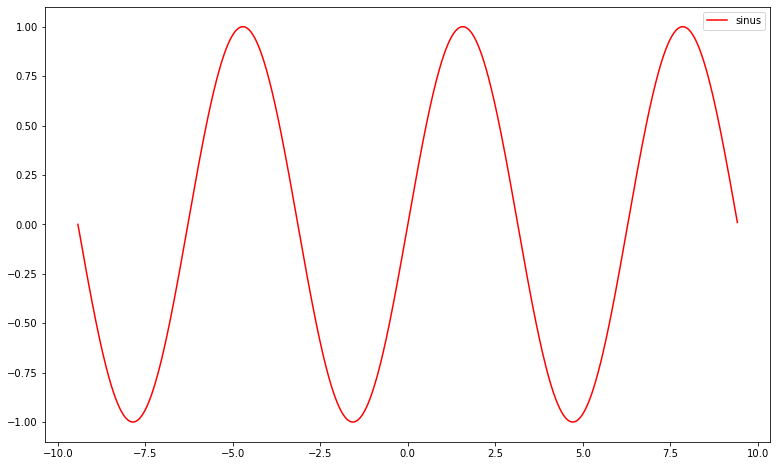

In [4]:
X = np.arange(-3*np.pi,3*np.pi,0.01)
y = np.sin(X)

plt.figure(figsize=(13,8))
plt.plot(X, y, label='sinus', color='red')
plt.legend()
plt.show()

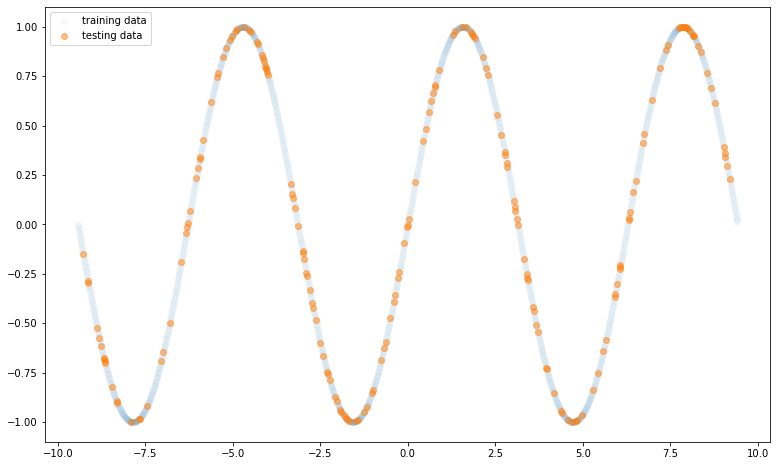

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

plt.figure(figsize=(13,8))
plt.scatter(X_train, y_train, alpha = 0.03, label='training data')
plt.scatter(X_test, y_test,alpha=0.5,label='testing data')

plt.legend()
plt.show()

$$[TODO - Students]$$

* Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train.
* What activation should we use for ouput layer ?
* What loss should we use ?

* Try different activations for the hidden layer and plot the predictions obtained on x_test
* Plot also a learning curve

In [14]:
import keras 

In [16]:
model = keras.Model()

model.compile(optimizer='sgd',loss='mean_squared_error',)

# history = model.fit(X_train,y_train)

In [27]:
# history = model.fit(X_train,y_train)

In [42]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inputs = Input(shape=(1, ))
x = Dense(16, activation='sigmoid')(inputs)
# x = Dense(8, activation='sigmoid')(x)
outputs = Dense(1)(x)
model = Model(inputs, outputs)
model.compile(optimizer='sgd', loss='mean_squared_error')
history=model.fit(X_train, y_train, epochs=100, validation_split=0.33)
y_pred = model.predict(X_test)

Epoch 1/100
36/36 [==============================] - 0s 6ms/step - loss: 0.7270 - val_loss: 0.5246
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4697 - val_loss: 0.5090
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4625 - val_loss: 0.5040
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4602 - val_loss: 0.5056
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4587 - val_loss: 0.5023
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4575 - val_loss: 0.4991
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4556 - val_loss: 0.5041
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4555 - val_loss: 0.5024
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4545 - val_loss: 0.5009
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4530 - val_loss: 0.4946
Epoch 11/

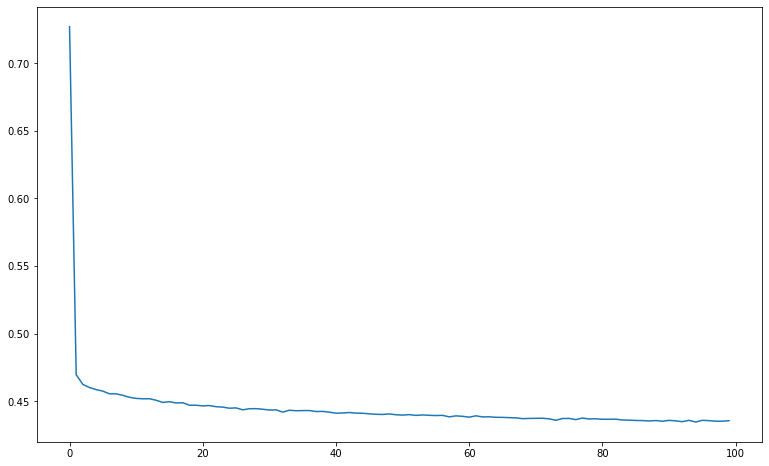

In [43]:
# Plot leaning cuve
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.show()

In [44]:
def plot_prediction(title, model):
    y_hat_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

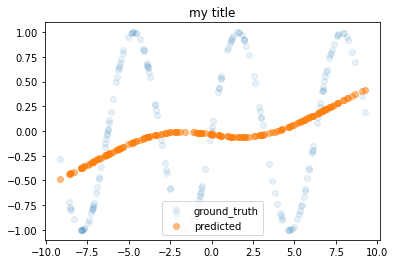

In [45]:
plot_prediction("my title", model)

$$[TODO - Students]$$

Try adding layers and increasing the layers dimension to better fit the test data. You can use the following function to quickly build your models.

* Try different n_layers (for example 1, 10, 100)
* Try different hidden_dim (for example 32, 128, 256, 512)
* Try different bach size
* Try to understand the `patience` parameters of early stopping

In [59]:
def build_sin_regression(activation, n_layers, hidden_dim):
    input = Input(shape=(1,), name='input')

    for i in range(n_layers):
      if i==0:
        x = Dense(input_shape=(1,), units=hidden_dim, activation=activation, name='layer_'+str(i))(input)
      else:
        x = Dense(units=hidden_dim, activation=activation, name='layer_'+str(i))(x)

    output = Dense(1, activation='linear', name='output')(x)
    model1 = Model(input, output, name = 'sinus_regression')
    return model1

In [72]:
model1 = build_sin_regression(activation = 'sigmoid', n_layers = 10, hidden_dim = 32)
model1.compile(loss='mse', optimizer='adam')
model1.summary()

Model: "sinus_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1)]               0         
_________________________________________________________________
layer_0 (Dense)              (None, 32)                64        
_________________________________________________________________
layer_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
layer_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
layer_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
layer_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
layer_5 (Dense)              (None, 32)           

In [73]:
def plot_prediction2(title, model1):
    y_hat_test = model1.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

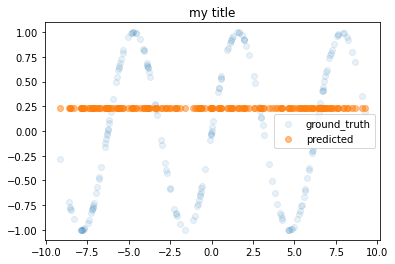

In [74]:
plot_prediction("my title", model1)

In [76]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history = model1.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 1s 7ms/step - loss: 0.5111 - val_loss: 0.5035
Epoch 2/20
48/48 [==============================] - 0s 4ms/step - loss: 0.5053 - val_loss: 0.4951
Epoch 3/20
48/48 [==============================] - 0s 4ms/step - loss: 0.5076 - val_loss: 0.4995
Epoch 4/20
48/48 [==============================] - 0s 4ms/step - loss: 0.5064 - val_loss: 0.5057
Epoch 5/20
48/48 [==============================] - 0s 4ms/step - loss: 0.5072 - val_loss: 0.4953
Epoch 6/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5069 - val_loss: 0.4958
Epoch 7/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5049 - val_loss: 0.4972
Epoch 8/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5060 - val_loss: 0.4953
Epoch 9/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5059 - val_loss: 0.4953
Epoch 10/20
48/48 [==============================] - 0s 3ms/step - loss: 0.5069 - val_loss: 0.4951
Epoch 11/20
48/48 [

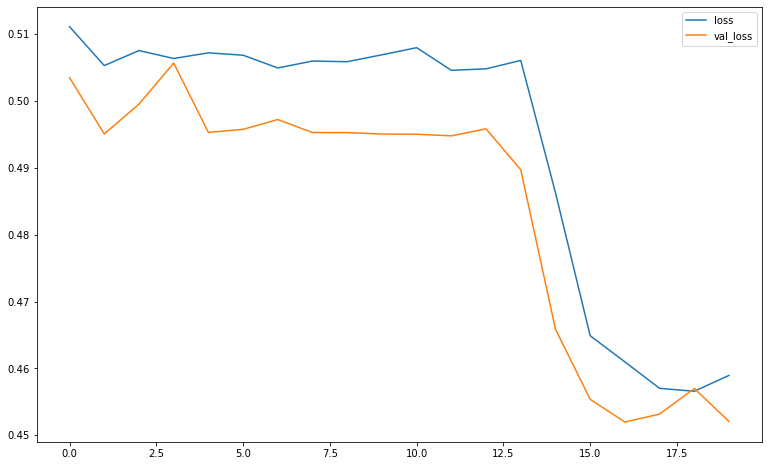

In [77]:
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

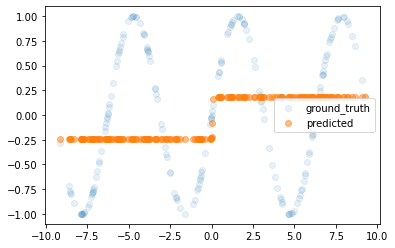

In [78]:
y_hat_test = model1.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

## Build an MLP to classify MNIST images

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We’ll call the images “x” and the labels “y”. Both the training set and test set contain images and their corresponding labels; for example, the training images are mnist.train.images and the training labels are mnist.train.labels.

In [79]:
# Load dataset
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between a train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [86]:
# Reshape the image from 3d to 2d (nb_items, other dime)
X_train_reshaped=X_train.reshape(-1,1)
X_train_reshaped.shape

(47040000, 1)

In [87]:
# Normalize the data (input between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)

In [ ]:
# One hot encode the label


In [ ]:
# Buid MLP model
# You can use the following function
def build_MLP(input_shape, activation, layers, nb_class):
    input = Input(shape=(input_shape,), name='input')

    for i, hidden_size in enumerate(layers):
        if i == 0:
            x = Dense(input_shape=(input_shape,), units=hidden_size, activation=activation, name='layer_'+str(i))(input)
        else:
            x = Dense(units=hidden_size, activation=activation, name='layer_'+str(i))(x)

    output = Dense(nb_class, activation='softmax', name='output')(x)
    model = Model(input, output, name = 'mnist_classifier')
    model.summary()
    return model

model = build_MLP(## TO BE COMPLETED ##)

In [ ]:
# Compile and fit the model
callbacks_list = [EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam')
history = model.fit(''' X''', ''' y ''', validation_split = 0.1, callbacks=callbacks_list,
                    batch_size=32, epochs=20)

In [ ]:
# Print history keys
history.history.keys()

In [ ]:
# Babysit your model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['accuracy'], label="accuracy")
ax2.plot(history.history['val_accuracy'], label="val_accuracy")
ax2.legend()
plt.show()

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test_enc)
print('Test loss:', score[0])
print('Test accuracy', score[1])

In [ ]:
# Modify the network in order to obtain better accuracy (better than 0.96)